In [3]:
import numpy as np
import pandas as pd
import geopandas as gpd

import rasterio as rst
from rasterio.plot import show
from rasterio.mask import mask
#from rasterio.windows import Window, from_bounds
from rasterio.features import shapes

from shapely.geometry import shape

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
shp = 'ykn_int.shp'
ykn_int = gpd.read_file(shp)

# Polygonize

After cropping the original Hansen geotiffs 60N-140W & 70N-140W with the bounds of the forest (-140, 58, -130, 64) to make the size smaller, the next step is to clip the rasters to the forest but somehow it resulted in 400Mb files that were too large to open. So I resorted to polygonizing the cropped tiffs so I can get 2 geodataframes (60N-140W & 70N-140W), concatenate them then clip to the forest and graph it.

In [4]:
mask = None
with rst.Env():
    with rst.open('output_Hansen_GFC-2019-v1.7_datamask_60N_140W_2.tif') as src:
        image = src.read(1) 
        results = (
        {'properties': {'raster_val': v}, 'geometry': s}
        for i, (s, v) 
        in enumerate(
            shapes(image, mask=mask, transform=src.transform)))

In [5]:
geoms = list(results)

In [6]:
polygon_60N = gpd.GeoDataFrame.from_features(geoms)

In [7]:
polygon_60N.shape

(141899, 2)

In [8]:
polygon_60N['raster_val'].value_counts()

2.0    111017
1.0     30881
0.0         1
Name: raster_val, dtype: int64

In [9]:
mask = None
with rst.Env():
    with rst.open('output_Hansen_GFC-2019-v1.7_datamask_70N_140W_2.tif') as src:
        image = src.read(1) 
        results = (
        {'properties': {'raster_val': v}, 'geometry': s}
        for i, (s, v) 
        in enumerate(
            shapes(image, mask=mask, transform=src.transform)))

In [10]:
geoms = list(results)

In [11]:
polygon_70N = gpd.GeoDataFrame.from_features(geoms)

In [12]:
polygon_70N.shape

(156582, 2)

In [13]:
polygon_70N['raster_val'].value_counts()

2.0    136091
1.0     20491
Name: raster_val, dtype: int64

In [14]:
polygon=pd.concat([polygon_60N, polygon_70N], axis=0)

#### crs?

There's a warning later about crs not matching but this section also gives error

In [23]:
polygon.crs

In [24]:
ykn_int.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
polygon.to_crs="EPSG:4326"

In [31]:
polygon.to_crs("EPSG:4326")

TypeError: 'str' object is not callable

#### Clip

In [15]:
ykn_int_hansen = polygon.clip(ykn_int)

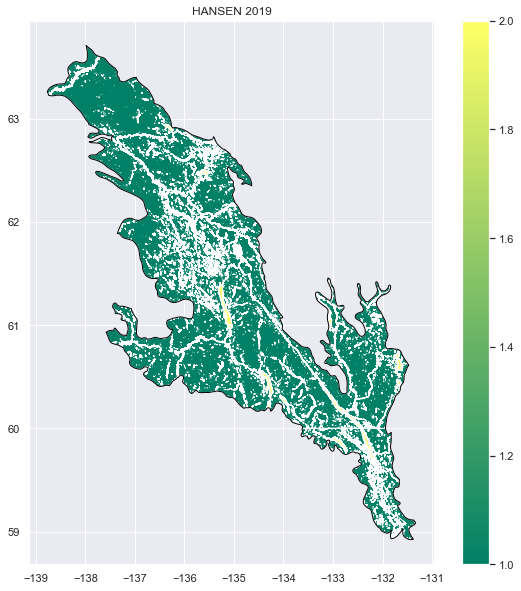

In [21]:
cmap='summer'
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.set_title('HANSEN 2019')
ykn_int_hansen.plot(ax=ax,column='raster_val',cmap=cmap,legend=True)
ykn_int.plot(ax=ax, color='none', edgecolor='black')
plt.show()

#### Comparison with geocarbon above ground biomass

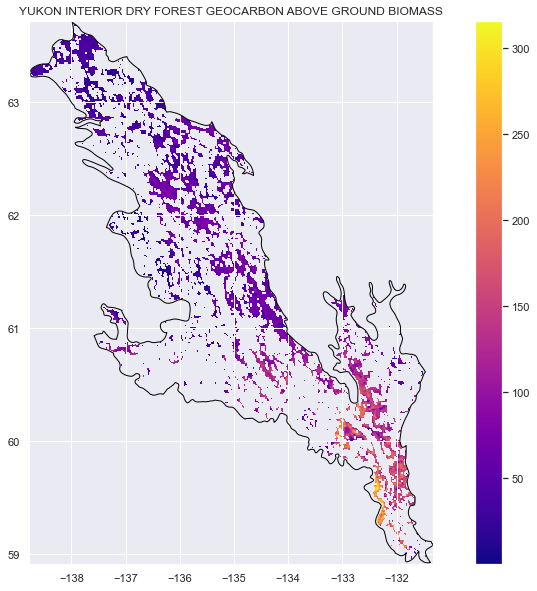

In [20]:
from IPython.display import Image
Image(filename='geocarbon_abg.png') 

Therefore this does not represent the true state of forest cover at all... Does it include only certain tree heights?

#### Soil organic carbon

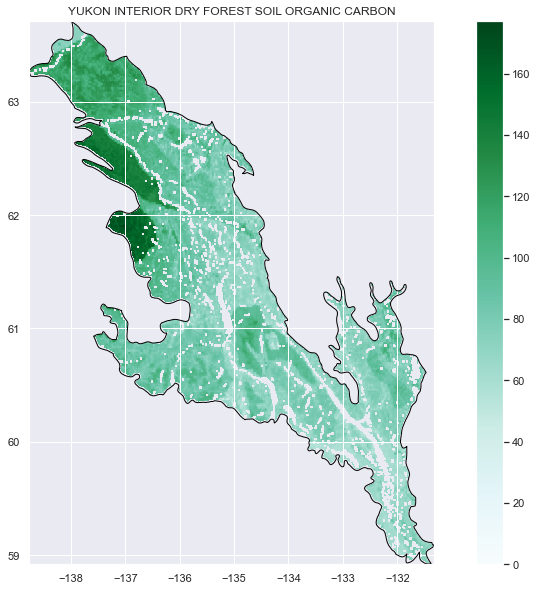

In [23]:
#from IPython.display import Image
Image(filename='GSOC.png') 

#### Soil organic carbon density kg / 1m depth

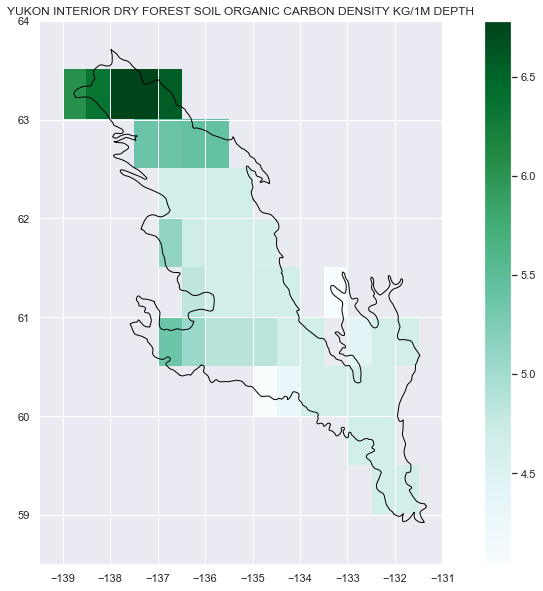

In [24]:
#from IPython.display import Image
Image(filename='density.png') 

#### Hansen gain

In [3]:
mask = None
with rst.Env():
    with rst.open('output_Hansen_GFC-2019-v1.7_gain_60N_140W_2.tif') as src:
        image = src.read(1) 
        results = (
        {'properties': {'raster_val': v}, 'geometry': s}
        for i, (s, v) 
        in enumerate(
            shapes(image, mask=mask, transform=src.transform)))

In [4]:
geoms = list(results)

In [5]:
polygon_60N = gpd.GeoDataFrame.from_features(geoms)

In [6]:
polygon_60N.shape

(68582, 2)

In [7]:
polygon_60N['raster_val'].value_counts()

1.0    67246
0.0     1336
Name: raster_val, dtype: int64

In [8]:
mask = None
with rst.Env():
    with rst.open('output_Hansen_GFC-2019-v1.7_gain_70N_140W_2.tif') as src:
        image = src.read(1) 
        results = (
        {'properties': {'raster_val': v}, 'geometry': s}
        for i, (s, v) 
        in enumerate(
            shapes(image, mask=mask, transform=src.transform)))

In [9]:
geoms = list(results)

In [10]:
polygon_70N = gpd.GeoDataFrame.from_features(geoms)

In [11]:
polygon_70N.shape

(93747, 2)

In [12]:
polygon_70N['raster_val'].value_counts()

1.0    84929
0.0     8818
Name: raster_val, dtype: int64

In [13]:
polygon=pd.concat([polygon_60N, polygon_70N], axis=0)

In [16]:
ykn_int_hansen = polygon.clip(ykn_int)

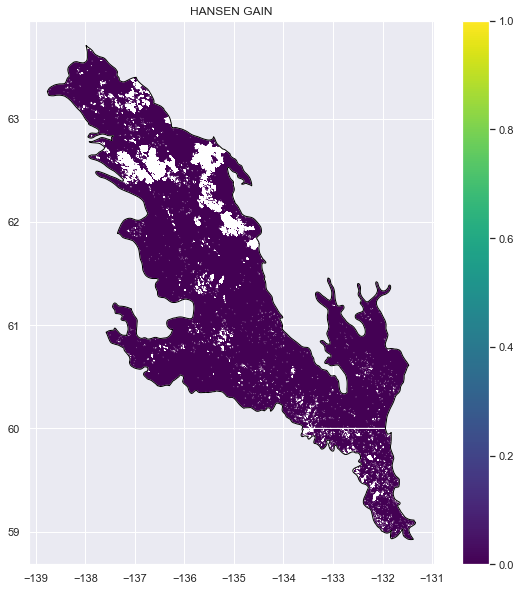

In [17]:
cmap='viridis'
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.set_title('HANSEN GAIN')
ykn_int_hansen.plot(ax=ax,column='raster_val',cmap=cmap,legend=True)
ykn_int.plot(ax=ax, color='none', edgecolor='black')
plt.show()

#### Hansen loss

In [3]:
mask = None
with rst.Env():
    with rst.open('output_Hansen_GFC-2019-v1.7_lossyear_60N_140W_2.tif') as src:
        image = src.read(1) 
        results = (
        {'properties': {'raster_val': v}, 'geometry': s}
        for i, (s, v) 
        in enumerate(
            shapes(image, mask=mask, transform=src.transform)))

In [4]:
geoms = list(results)

In [5]:
polygon_60N = gpd.GeoDataFrame.from_features(geoms)

In [21]:
polygon_60N.shape

(138592, 2)

In [22]:
polygon_60N['raster_val'].value_counts()

0.0     24825
13.0    15567
19.0     9679
4.0      9249
10.0     8609
9.0      7748
11.0     7409
14.0     7345
6.0      7091
12.0     6466
2.0      5548
7.0      5525
5.0      4616
18.0     4118
16.0     3742
1.0      3687
8.0      3274
15.0     2058
3.0      1794
17.0      242
Name: raster_val, dtype: int64

In [6]:
mask = None
with rst.Env():
    with rst.open('output_Hansen_GFC-2019-v1.7_lossyear_70N_140W.tif') as src:
        image = src.read(1) 
        results = (
        {'properties': {'raster_val': v}, 'geometry': s}
        for i, (s, v) 
        in enumerate(
            shapes(image, mask=mask, transform=src.transform)))

In [7]:
geoms = list(results)

In [8]:
polygon_70N = gpd.GeoDataFrame.from_features(geoms)

In [9]:
polygon_70N.shape

(764484, 2)

In [10]:
polygon_70N['raster_val'].value_counts()

0.0     257778
4.0      69471
5.0      63063
13.0     58884
10.0     42121
14.0     38520
12.0     31604
6.0      30248
19.0     25969
7.0      23974
9.0      23799
11.0     18372
1.0      15327
16.0     15187
2.0      14409
8.0       9919
3.0       9122
15.0      6961
18.0      5616
17.0      4140
Name: raster_val, dtype: int64

In [11]:
polygon=pd.concat([polygon_60N, polygon_70N], axis=0)

In [12]:
ykn_int_hansen = polygon.clip(ykn_int)

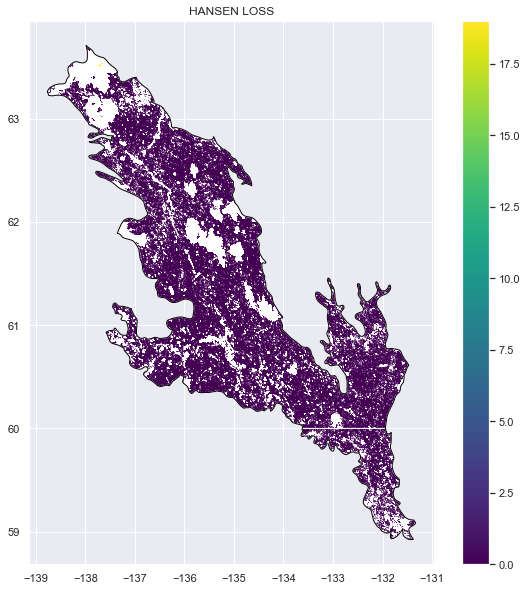

In [13]:
cmap='viridis'
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.set_title('HANSEN LOSS')
ykn_int_hansen.plot(ax=ax,column='raster_val',cmap=cmap,legend=True)
ykn_int.plot(ax=ax, color='none', edgecolor='black')
plt.show()